In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


In [6]:
b_cancer = pd.read_csv("C:/Users/hjung/Downloads/유방암.csv",engine = 'python',
                        encoding='CP949')
b_cancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print(b_cancer.isnull().sum(axis=0))
b_cancer.info()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (to

#### 목표변수 하나와 설명 변수 30가지로 구성된 데이터이며,목표변수는 이산형이다. 결측치는 존재 하지 않았다.

In [8]:
np.random.seed(seed=1234)
msk = np.random.rand(b_cancer.shape[0],)<0.7
c_train=b_cancer[msk]
c_test = b_cancer[~msk]
print("train data size: {}".format(c_train.shape))
print("test data size: {}".format(c_test.shape))

train data size: (385, 31)
test data size: (184, 31)


#### 학습 데이터 70대 테스트데이터 30으로 선택했다.

In [ ]:
'''
log_model = sm.Logit.from_formula("""diagnosis~mean radius+mean texture+mean perimeter+
mean area+mean smoothness+mean compactness+mean concavity+mean concave points+mean symmetry+
mean fractal dimension+radius error+texture error+perimeter error+area error+
smoothness error+compactness error+concavity error+concave points error+symmetry error+
fractal dimension error+worst radius+worst texture+worst perimeter+worst area+worst smoothness+
worst compactness+worst concavity+worst concave points+worst symmetry+worst fractal dimension""",c_train)
#+1은 절편 추가, -1은 절편이 빠진다.
#log_result = log_model.fit()
log_result = log_model.fit(method='bfgs')
print(log_result.summary())
'''

In [10]:
#데이터 구성하기
#데이터분할(train,test 7:3비율로 분할,numpy의 random 함수 이용 방법)
np.random.seed(1234)
#0.7보다 작으면 true, -> train, 아니면 false -> test
msk = np.random.rand(b_cancer.shape[0]) < 0.7
b_train = b_cancer[msk]
b_test = b_cancer[~msk]
#train/test 데이터의 목표변수 설명변수 지정
b_train_y = b_train["diagnosis"]
b_train_x = b_train.drop("diagnosis",axis=1,inplace=False)
b_test_y = b_test["diagnosis"]
b_test_x = b_test.drop("diagnosis",axis=1,inplace=False)
#데이터 크기
print("train data X size: {}".format(b_train_x.shape))
print("train data Y size: {}".format(b_train_y.shape))
print("test data X size: {}".format(b_test_x.shape))
print("test data X size: {}".format(b_test_y.shape))

train data X size: (385, 30)
train data Y size: (385,)
test data X size: (184, 30)
test data X size: (184,)


In [11]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(b_train_x,b_train_y)
#훈련데이터 정확도
print("Accuracry on training set: {:.3f}".format(tree_uncustomized.score(b_train_x,
                                                                        b_train_y)))
#test 데이터 정확도
print("Accuracry on training set: {:.3f}".format(tree_uncustomized.score(b_test_x,
                                                                       b_test_y)))


Accuracry on training set: 1.000
Accuracry on training set: 0.935


In [12]:
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

In [13]:
#train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
#적용가능한 criterio:gini, entropy
para_criterion=["gini","entropy"]
#para_criterion별로 트리 모델 생성 및 정확도값 저장
for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion=criterion,random_state=1234)
    tree1.fit(b_train_x,b_train_y)
    train_accuracy.append(tree1.score(b_train_x,b_train_y))
    test_accuracy.append(tree1.score(b_test_x,b_test_y))
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"]=test_accuracy
ds_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.935
1,entropy,1.0,0.967


In [14]:
#train 및 test정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []
#최대 깊이 1~10까지 순차 실행
n_iter_depth = 10
#적용가능한 criterion:gini,entropy
list_criterion = ["gini","entropy"]
#criterion:gini,entropy & max_depth: 1~10까지 반복 실행
for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion,max_depth=depth,random_state=1234)
        tree2.fit(b_train_x,b_train_y)
        
        train_accuracy.append(tree2.score(b_train_x,b_train_y))
        test_accuracy.append(tree2.score(b_test_x,b_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [15]:
#데이터 테이블로 저장
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.922,0.908
1,gini,2,0.943,0.940
2,gini,3,0.971,0.924
3,gini,4,0.992,0.946
4,gini,5,0.995,0.935
5,gini,6,0.997,0.935
6,gini,7,1.000,0.935
7,gini,8,1.000,0.935
8,gini,9,1.000,0.935
9,gini,10,1.000,0.935


#### entropy 를 사용했을경우 97%정도의 정확도로 gini index 보다 더나은 결과를 얻을수 있었다.

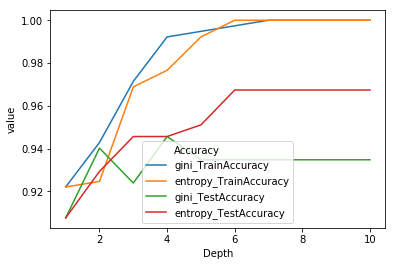

In [32]:
#데이터 테이블로 저장
ds_accuracy2_melt = pd.melt(ds_accuracy2,id_vars=["Criterion","Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"]+"_"+ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=ds_accuracy2_melt)

#### 위의 내용을 조금더 직관적이게 확인할수 있는 그래프로, 역시 트레인데이터에선 둘다 100%에 근접하는 정확도를 보여주었지만, 테스트셋에선, entory 지수가 4%정도의 더욱 높은 정확도를 보여주었다.                             
#### 둘다 상당히 높은 정확도를 가지는데, overfitting이 의심된다.

In [34]:
#train 및 test정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#parameter 결과 테이블을 위함
para_criterion=[];para_max_depth = []; para_min_leaf_size=[]
#최대 깊이 10
max_depth = 10
#잎사귀 수 10~50까지 10단위로 순차 실행
list_min_leaf_size = [i*10 for i in range(1,6)]
#criterion:gini,entropy & min smaple size 10~50까지 반복 실행
for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                      min_samples_leaf=leafsize, random_state=1234)
        tree3.fit(b_train_x,b_train_y)
        train_accuracy.append(tree3.score(b_train_x,b_train_y))
        test_accuracy.append(tree3.score(b_test_x,b_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [35]:
#데이터 테이블로 저장
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.943,0.946
1,gini,10,20,0.925,0.929
2,gini,10,30,0.922,0.908
3,gini,10,40,0.922,0.908
4,gini,10,50,0.922,0.908
5,entropy,10,10,0.969,0.940
6,entropy,10,20,0.925,0.929
7,entropy,10,30,0.922,0.908
8,entropy,10,40,0.922,0.908
9,entropy,10,50,0.922,0.908


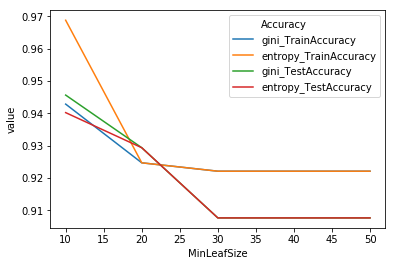

In [36]:
ds_accuracy3_melt = pd.melt(ds_accuracy3,id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"]=ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue="Accuracy",data=ds_accuracy3_melt)


In [26]:
#트리모델 생성, gini ,depth=4로 모델 생성
tree = DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1234)
#tree model training
tree.fit(b_train_x,b_train_y)
#트리모델을 tree.dot파일로 저장
export_graphviz(tree,out_file="tree.dot", class_names=["0","1"],
              feature_names=b_train_x.columns,impurity=False,filled=True)
#path 설정:graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고
os.environ["PATH"] += os.pathsep +"C:/Users/hjung/Anaconda3/Library/bin/graphviz/"

#graphviz를 이용해 트리 모델 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [43]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(b_train_x, b_train_y)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(b_train_x, b_train_y)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
predictions = clf.predict(b_test_x)
print(accuracy_score(b_test_y, predictions))

0.9619565217391305


In [46]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
